In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from libra_toolbox.tritium.model import (
    quantity_to_activity,
    activity_to_quantity,
)
from libra_toolbox.tritium.plotting import (
    ureg,
    plot_bars,
    plot_integrated_top_release,
    plot_integrated_wall_release,
    plot_irradiation,
    plot_sample_activity_top,
    plot_sample_activity_wall,
    plot_salt_inventory,
    plot_top_release,
    plot_wall_release,
)

ureg.mpl_formatter = "{:~P}"
# remove top and right axes by default
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# set axis below true by default
plt.rcParams["axes.axisbelow"] = True

from tritium_model_errors import *

Processed data stored in ../../data/processed_data.json


/root/FLiBe-1L-run-1/analysis/tritium/tritium_model_errors.py:135: UserWarning: Activity of 1L-FLB-IV_1-0-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/root/FLiBe-1L-run-1/analysis/tritium/tritium_model_errors.py:135: UserWarning: Activity of 1L-FLB-IV_1-0-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/root/FLiBe-1L-run-1/analysis/tritium/tritium_model_errors.py:135: UserWarning: Activity of 1L-FLB-IV_1-0-4 is negative after substracting background. Setting to zero.
  warnings.warn(
/root/FLiBe-1L-run-1/analysis/tritium/tritium_model_errors.py:135: UserWarning: Activity of 1L-FLB-IV_1-1-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/root/FLiBe-1L-run-1/analysis/tritium/tritium_model_errors.py:135: UserWarning: Activity of 1L-FLB-IV_1-1-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/root/FLiBe-1L-run-1/analysis/tritium/tritium_model_errors.py:135: UserWarn

Quantity of T consumed: 5.62×10¹³ particle
Uncertainty on T consumed: 2.12×10¹¹ particle
Quantity of T consumed: 1.00×10⁵ Bq
Quantity of T produced IV: 1.80×10¹ Bq
Quantity of T produced: 1.01×10¹⁰ particle
Measured TBR: 1.80e-04 particle / neutron
8.87664477250273 dimensionless


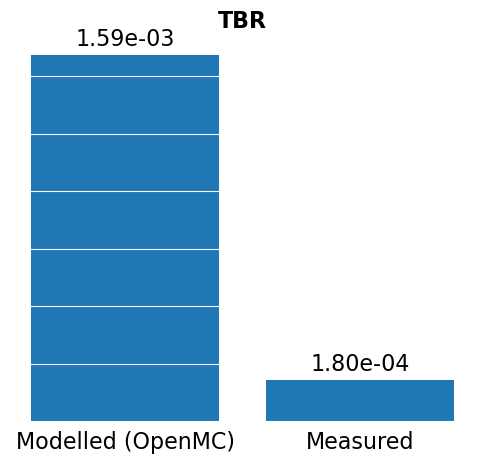

In [2]:
print(f"Quantity of T consumed: {T_consumed.to(ureg.particle):.2e~P}")
print(
    f"Uncertainty on T consumed: {(neutron_rate_relative_uncertainty * T_consumed).to(ureg.particle):.2e~P}"
)
print(f"Quantity of T consumed: {quantity_to_activity(T_consumed).to(ureg.Bq):.2e~P}")
print(f"Quantity of T produced IV: {T_produced_IV:.2e~P}")
print(
    f"Quantity of T produced: {activity_to_quantity(T_produced_IV).to(ureg.particle):.2e~P}"
)
print(f"Measured TBR: {measured_TBR:.2e}")
plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1],
    [calculated_TBR, measured_TBR],
    tick_label=["Modelled (OpenMC)", "Measured"],
    yerr=[0, neutron_rate_relative_uncertainty * measured_TBR],
)

plt.bar_label(bars, fontsize=16, fmt="%.2e", padding=3)
plt.title("TBR", weight="bold", fontsize=16)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
# plt.tight_layout()
print((calculated_TBR / measured_TBR).to(ureg.dimensionless))
plt.savefig("tbr_comparison.pdf", bbox_inches="tight")
plt.show()

In [3]:
baby_model.run(50 * ureg.day)

/root/miniconda3/envs/flibe-1l-run-1/lib/python3.13/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [4]:
print(f"Transport:")
print(f"  mass transport coeff top: {baby_model.k_top:.2e~P}")
print(f"  mass transport coeff wall: {baby_model.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model.TBR:.2e~P}")
print(f"  neutron rate: {baby_model.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model.neutron_rate * baby_model.TBR:.2e~P}")
# print(f"  k_top/k_wall: {baby_model.k_top/baby_model.k_wall:.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff top: 3.87×10⁻⁶ m/s
  mass transport coeff wall: 0.00×10⁰ m/s
Source:
  TBR: 1.80×10⁻⁴ particle/n
  neutron rate: 1.30×10⁹ n/s
  neutron rate * TBR: 2.34×10⁵ particle/s
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


/root/miniconda3/envs/flibe-1l-run-1/lib/python3.13/site-packages/matplotlib/axes/_axes.py:3665: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y = np.asarray(y, dtype=object)


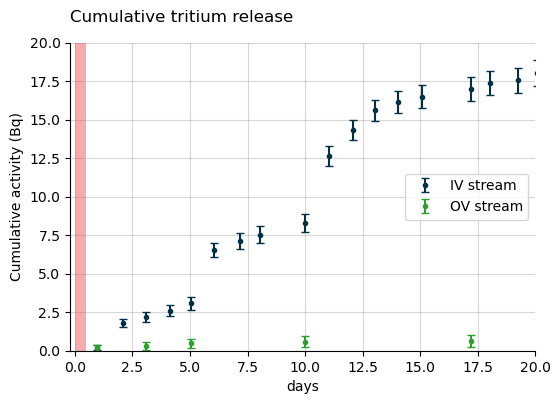

In [5]:
plt.figure(figsize=(6, 4))
# (l,) = plot_integrated_top_release(baby_model, color="#023047", label="Top")
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
# labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

# Get cumulative activities and their errors
iv_cumulative = IV_stream_with_errors.get_cumulative_activity("total")
iv_errors = IV_stream_with_errors.get_cumulative_activity_errors("total")

ov_cumulative = OV_stream_with_errors.get_cumulative_activity("total")
ov_errors = OV_stream_with_errors.get_cumulative_activity_errors("total")

# Plot with error bars
plt.errorbar(
    replacement_times_top, 
    iv_cumulative, 
    yerr=iv_errors,
    fmt='o',
    markersize=3,
    color="#023047",
    capsize=3,
    label="IV stream"
)
plt.errorbar(
    replacement_times_walls,
    ov_cumulative,
    yerr=ov_errors,
    fmt='o',
    markersize=3,
    color="tab:green",
    capsize=3,
    label="OV stream"
)

# add line where top is 99% of final
# ydata = l.get_ydata()
# xdata = l.get_xdata()
# target_release_frac = 0.99
# x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]

# plt.axvline(x=x_target, color="k", linestyle="--")
# plt.annotate(
#     f"99% of steady state \n {x_target: .2f}",
#     (x_target, target_release_frac * ydata[-1]),
#     xytext=(70, 20),
#     textcoords="offset points",
#     ha="center",
#     va="bottom",
#     color="k",
# )


plt.title("Cumulative tritium release", loc="left", pad=15)
plt.ylim(bottom=0, top=20)
plt.xlim(left=-0.2, right=20)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")
plt.legend()

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

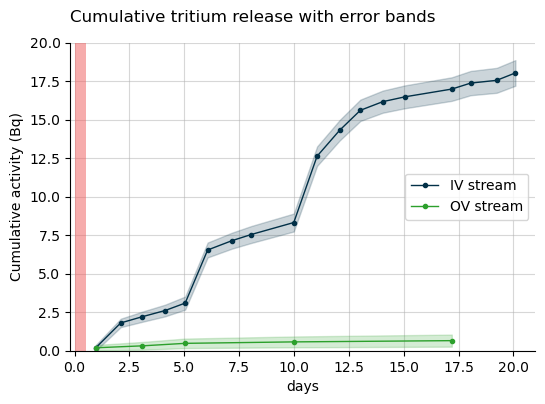

In [6]:
plt.figure(figsize=(6, 4))
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)

# Get cumulative activities and their errors
iv_cumulative = IV_stream_with_errors.get_cumulative_activity("total")
iv_errors = IV_stream_with_errors.get_cumulative_activity_errors("total")

ov_cumulative = OV_stream_with_errors.get_cumulative_activity("total")
ov_errors = OV_stream_with_errors.get_cumulative_activity_errors("total")

# Convert times to numpy arrays for plotting
times_top = np.array([t.magnitude for t in replacement_times_top])
times_walls = np.array([t.magnitude for t in replacement_times_walls])

# Extract magnitudes for cumulative values (they have units)
iv_cumulative_mag = iv_cumulative.magnitude if hasattr(iv_cumulative, 'magnitude') else iv_cumulative
ov_cumulative_mag = ov_cumulative.magnitude if hasattr(ov_cumulative, 'magnitude') else ov_cumulative

# Plot lines with error bands
plt.plot(times_top, iv_cumulative_mag, color="#023047", label="IV stream", linewidth=1, marker='o', markersize=3)
plt.fill_between(
    times_top,
    iv_cumulative_mag - iv_errors,
    iv_cumulative_mag + iv_errors,
    color="#023047",
    alpha=0.2
)

plt.plot(times_walls, ov_cumulative_mag, color="tab:green", label="OV stream", linewidth=1, marker='o', markersize=3)
plt.fill_between(
    times_walls,
    ov_cumulative_mag - ov_errors,
    ov_cumulative_mag + ov_errors,
    color="tab:green",
    alpha=0.2
)

plt.title("Cumulative tritium release with error bands", loc="left", pad=15)
plt.ylim(bottom=0, top=20)
plt.xlim(left=-0.2, right=21)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")
plt.legend()

plt.savefig("cumulative_release_bands.pdf", bbox_inches="tight")

Temperature channels loaded:
  DIP TC: 18759 data points
  SIDE TC: 18759 data points
  OV SIDE: 18759 data points
  FURNACE: 18759 data points
  Dip heater: 10 setpoints


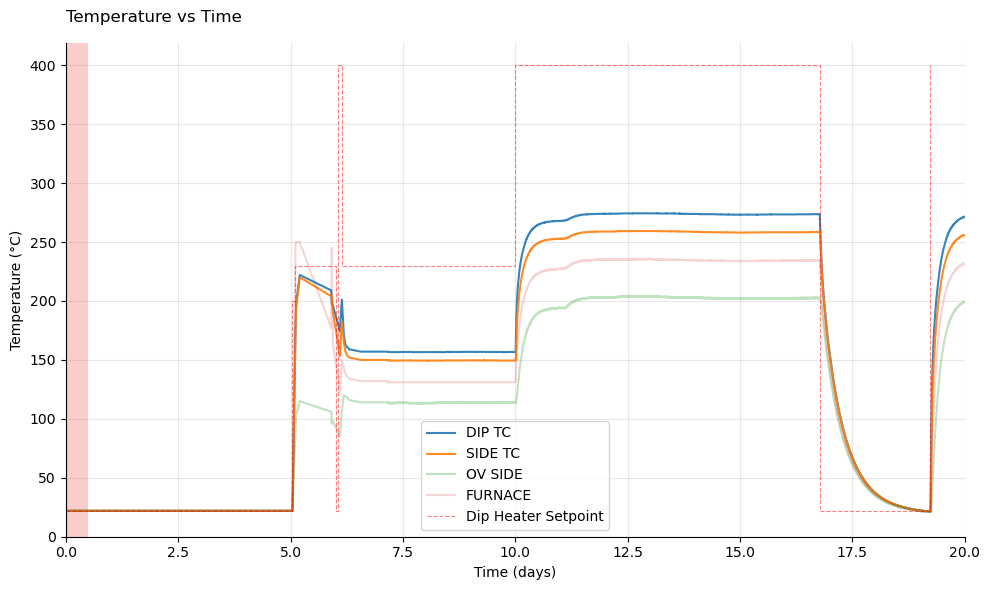

In [7]:
# Load temperature data
import sys
sys.path.append('../temperature')
from temperature_data import load_temperature_data

temp_data = load_temperature_data()

# Access temperature channels
dip_tc = temp_data['TC1']      # DIP TC
side_tc = temp_data['TC2']     # SIDE TC
ov_side_tc = temp_data['TC3']  # OV SIDE
furnace_tc = temp_data['TC4']  # FURNACE
dip_heater = temp_data['dip_heater']

print(f"Temperature channels loaded:")
print(f"  {dip_tc.tc_label}: {len(dip_tc.get_temperature())} data points")
print(f"  {side_tc.tc_label}: {len(side_tc.get_temperature())} data points")
print(f"  {ov_side_tc.tc_label}: {len(ov_side_tc.get_temperature())} data points")
print(f"  {furnace_tc.tc_label}: {len(furnace_tc.get_temperature())} data points")
print(f"  Dip heater: {len(dip_heater.get_setpoint_times())} setpoints")

# Plot temperature vs time
plt.figure(figsize=(10, 6))

# Plot thermocouple data
plt.plot(dip_tc.get_times_days(), dip_tc.get_temperature(), 
         label=dip_tc.tc_label, linewidth=1.5, alpha=0.9)
plt.plot(side_tc.get_times_days(), side_tc.get_temperature(), 
         label=side_tc.tc_label, linewidth=1.5, alpha=0.9)
plt.plot(ov_side_tc.get_times_days(), ov_side_tc.get_temperature(), 
         label=ov_side_tc.tc_label, linewidth=1.5, alpha=0.3)
plt.plot(furnace_tc.get_times_days(), furnace_tc.get_temperature(), 
         label=furnace_tc.tc_label, linewidth=1.5, alpha=0.2)

# Plot dip heater setpoints as step function
setpoint_times = dip_heater.get_setpoint_times()
setpoint_values = dip_heater.get_setpoint_values()
plt.step(setpoint_times, setpoint_values, where='post',
         label='Dip Heater Setpoint', linewidth=0.8, linestyle='--', color='red', alpha=0.5)

# Add irradiation shading
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.3)

plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Time', loc='left', pad=15)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.xlim(left=0, right=20)
plt.ylim(bottom=0)

plt.tight_layout()
plt.savefig('temperature_vs_time.pdf', bbox_inches='tight')
plt.show()

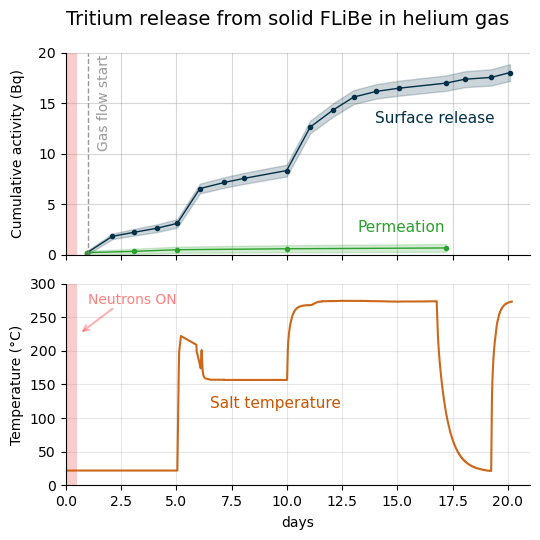

In [8]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.5, 5.5), sharex=True)

# Top plot: Tritium release (from cell 6)
plt.sca(ax1)  # Set current axis
ax1.grid(alpha=0.5)
ax1.set_ylim(bottom=0)

# Get cumulative activities and their errors
iv_cumulative = IV_stream_with_errors.get_cumulative_activity("total")
iv_errors = IV_stream_with_errors.get_cumulative_activity_errors("total")

ov_cumulative = OV_stream_with_errors.get_cumulative_activity("total")
ov_errors = OV_stream_with_errors.get_cumulative_activity_errors("total")

# Convert times to numpy arrays for plotting
times_top = np.array([t.magnitude for t in replacement_times_top])
times_walls = np.array([t.magnitude for t in replacement_times_walls])

# Extract magnitudes for cumulative values (they have units)
iv_cumulative_mag = iv_cumulative.magnitude if hasattr(iv_cumulative, 'magnitude') else iv_cumulative
ov_cumulative_mag = ov_cumulative.magnitude if hasattr(ov_cumulative, 'magnitude') else ov_cumulative

# Plot lines with error bands
ax1.plot(times_top, iv_cumulative_mag, color="#023047", linewidth=1, marker='o', markersize=3)
ax1.fill_between(
    times_top,
    iv_cumulative_mag - iv_errors,
    iv_cumulative_mag + iv_errors,
    color="#023047",
    alpha=0.2
)

ax1.plot(times_walls, ov_cumulative_mag, color="tab:green", linewidth=1, marker='o', markersize=3)
ax1.fill_between(
    times_walls,
    ov_cumulative_mag - ov_errors,
    ov_cumulative_mag + ov_errors,
    color="tab:green",
    alpha=0.2
)

# Add vertical line for flow rate change (from 0 to 30 SCCM at 11/20/2025 11:45)
# Run started at 11/19/2025 11:20, so this is ~1.017 days later
from datetime import datetime
run_start = datetime.strptime("11/19/2025 11:20", "%m/%d/%Y %H:%M")
flow_change = datetime.strptime("11/20/2025 11:45", "%m/%d/%Y %H:%M")
flow_change_days = (flow_change - run_start).total_seconds() / 86400.0
ax1.axvline(x=flow_change_days, color='gray', linestyle='--', linewidth=1, alpha=0.8)

# Add label along the vertical line
ax1.text(flow_change_days + 0.4, 15, 'Gas flow start', 
         color='gray', alpha=0.8, rotation=90, va='center', fontsize=10)

# Add text labels next to the data
ax1.text(14, 13.5, 'Surface release', 
         color="#023047", va='center', fontsize=11)
ax1.text(times_walls[-1] - 4, ov_cumulative_mag[-1] + 2, 'Permeation', 
         color="tab:green", va='center', fontsize=11)

# Add irradiation shading
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.3)

ax1.set_ylabel("Cumulative activity (Bq)", labelpad=10)
ax1.set_title("Tritium release from solid FLiBe in helium gas", loc="left", pad=20, fontsize=14)
ax1.set_ylim(0, 20)

# Bottom plot: Temperature profile (DIP TC only)
plt.sca(ax2)  # Set current axis
ax2.plot(dip_tc.get_times_days(), dip_tc.get_temperature(), 
         linewidth=1.5, alpha=0.9, color="#C75702")

# Add text label next to the temperature data
temp_times = dip_tc.get_times_days()
temp_values = dip_tc.get_temperature()
# Find a good position for the label (around day 10-12 where curve is relatively flat)
label_idx = np.argmin(np.abs(temp_times - 12))
ax2.text(9.5, 110, 'Salt temperature', 
         color="#C75702", va='bottom', ha='center', fontsize=11)

# Add "Neutrons ON" text
ax2.text(1, 270, 'Neutrons ON', color='red', alpha=0.5, fontsize=10)

# Add arrow from text to irradiation region
ax2.annotate('', xy=(0.6, 225), xytext=(2.2, 265),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.3, lw=1.5))

# Add irradiation shading
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.3)

ax2.set_xlabel('days', labelpad=5)
ax2.set_ylabel('Temperature (°C)')
ax2.grid(alpha=0.3)
ax2.set_xlim(left=0, right=21)
ax2.set_ylim(bottom=0, top=300)

plt.tight_layout()
plt.savefig('tritium_and_temperature.pdf', bbox_inches='tight')
plt.savefig('tritium_and_temperature.svg', bbox_inches='tight')
plt.savefig('tritium_and_temperature.png', bbox_inches='tight')
plt.show()

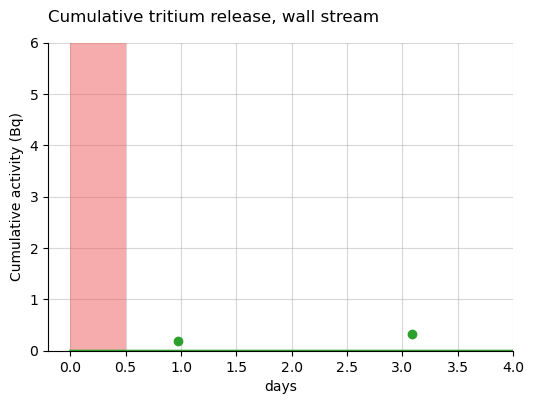

In [9]:
plt.figure(figsize=(6, 4))
plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

plt.title("Cumulative tritium release, wall stream", loc="left", pad = 15)
plt.ylim(top=6.0)
plt.xlim(right = 4)
plt.xlim(left = -0.2)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

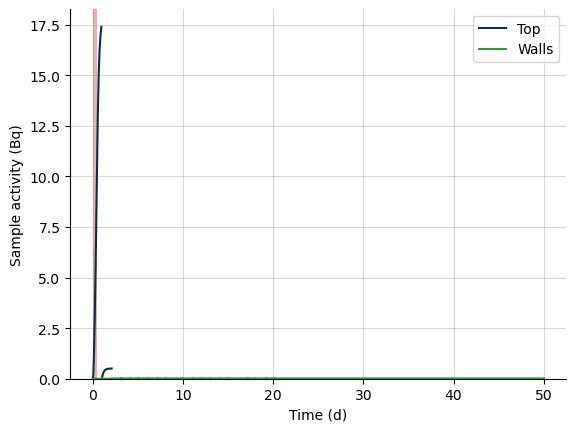

In [10]:
plot_sample_activity_top(
    baby_model, replacement_times=replacement_times_top, color="#023047", label="Top"
)
plot_sample_activity_wall(
    baby_model,
    replacement_times=replacement_times_walls,
    color="tab:green",
    label="Walls",
)
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)

plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
plt.legend()
plt.grid(alpha=0.5)

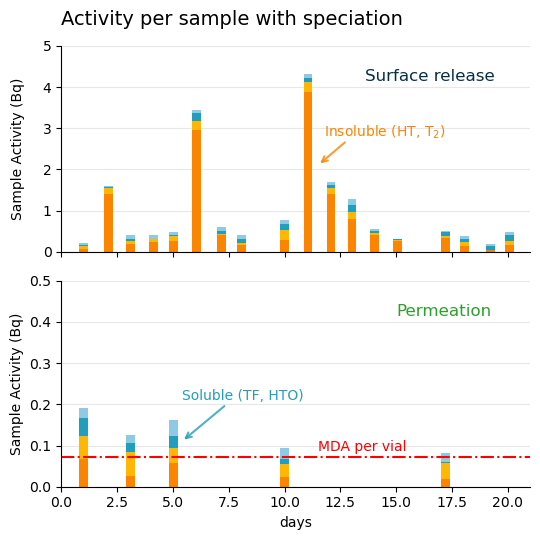

In [11]:
# Create figure with two subplots for bar charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.5, 5.5), sharex=True)

# Top plot: Inner vessel
plt.sca(ax1)
plot_bars(IV_stream, index=[time.to(ureg.day) for time in replacement_times_top], bar_width = 0.4)

ax1.grid(True, axis="y", alpha=0.3)
ax1.set_ylim(bottom=0, top=5)
ax1.set_xlim(0, 21)
ax1.set_ylabel("Sample Activity (Bq)", labelpad=13)
ax1.set_title("Activity per sample with speciation", loc="left", pad=15, fontsize=14)

# Add text label
ax1.text(13.6, ax1.get_ylim()[1] * 0.85, 'Surface release', 
         color='#023047', va='center', fontsize=12)

# Add insoluble species label
ax1.text(14.5, 2.8, r'Insoluble (HT, T$_2$)', 
         color='#FB8500', ha='center', fontsize=10)

ax1.annotate('', xy=(11.5, 2.1), xytext=(12.8, 2.7),
             arrowprops=dict(arrowstyle='->', color='#FB8500', alpha=0.8, lw=1.5))

# Bottom plot: Outer vessel
plt.sca(ax2)
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls], bar_width = 0.4)

ax2.grid(True, axis="y", alpha=0.3)
ax2.set_ylim(bottom=0, top=0.5)
ax2.set_xlim(0, 21)
ax2.set_ylabel("Sample Activity (Bq)")
ax2.set_xlabel("days")

# Add MDA line
MDA = 0.071  # Calculated by hand for demo, TODO create code to calculate automatically
ax2.axhline(y=MDA, color = "red", linestyle = "-.")
ax2.annotate(
    f"MDA per vial",
    (13.5, 0.08),
    xytext=(0, 0),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="red",
)

# Add text label
ax2.text(15, ax2.get_ylim()[1] * 0.85, 'Permeation', 
         color='tab:green', va='center', fontsize=12)

# Add soluble species label
ax2.text(5.4, 0.21, r'Soluble (TF, HTO)', 
         color='#219EBC', fontsize=10)

ax2.annotate('', xy=(5.4, 0.11), xytext=(7.4, 0.2),
             arrowprops=dict(arrowstyle='->', color='#219EBC', alpha=0.8, lw=1.5))

plt.tight_layout()
plt.savefig('per_sample_activity.pdf', bbox_inches='tight')
plt.savefig('per_sample_activity.svg', bbox_inches='tight')
plt.savefig('per_sample_activity.png', bbox_inches='tight')
plt.show()


## How did $k_\mathrm{top}$ improve compared to run 1

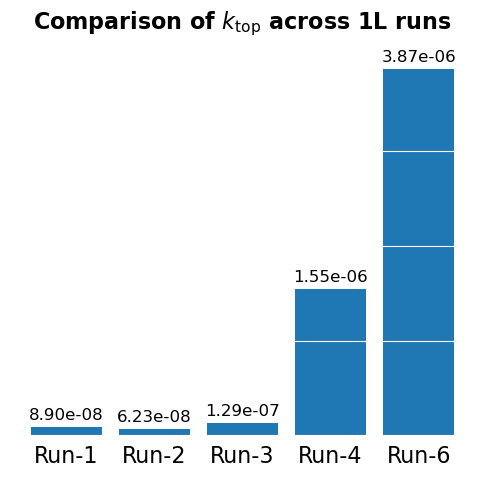

In [12]:
import requests

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-1/refs/tags/v0.5/data/processed_data.json"
response = requests.get(url)
data_run_1 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-2/refs/tags/v0.3/data/processed_data.json"
response = requests.get(url)
data_run_2 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-3/refs/heads/main/data/processed_data.json"
response = requests.get(url)
data_run_3 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-4/refs/heads/main/data/processed_data.json"
response = requests.get(url)
data_run_4 = response.json()

plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1, 2, 3, 4],
    [
        data_run_1["k_top"]["value"],
        data_run_2["k_top"]["value"],
        data_run_3["k_top"]["value"],
        data_run_4["k_top"]["value"],
        k_top.magnitude,
    ],
    tick_label=["Run-1", "Run-2", "Run-3", "Run-4", "Run-6"],
)

plt.bar_label(bars, fontsize=12, fmt="%.2e", padding=3)
plt.title(
    r"Comparison of $k_\mathrm{top}$ across 1L runs", weight="bold", fontsize=16, pad=15
)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
plt.show()

In [13]:
def model_from_json(json_data: dict) -> Model:
    """
    Create a model from JSON data.
    """
    # Extract the relevant data from the JSON
    k_top = json_data["k_top"]["value"] * ureg(json_data["k_top"]["unit"])
    k_wall = json_data["k_wall"]["value"] * ureg(json_data["k_wall"]["unit"])
    neutron_rate = json_data["neutron_rate_used_in_model"]["value"] * ureg(
        json_data["neutron_rate_used_in_model"]["unit"]
    )
    irradiations = [
        (
            irr["start_time"]["value"] * ureg(irr["start_time"]["unit"]),
            irr["stop_time"]["value"] * ureg(irr["stop_time"]["unit"]),
        )
        for irr in json_data["irradiations"]
    ]

    # Create a new model instance with the extracted parameters
    model = Model(
        radius=json_data["modelled_baby_radius"]["value"]
        * ureg(json_data["modelled_baby_radius"]["unit"]),
        height=json_data["modelled_baby_height"]["value"]
        * ureg(json_data["modelled_baby_height"]["unit"]),
        TBR=json_data["TBR_used_in_model"]["value"]
        * ureg(json_data["TBR_used_in_model"]["unit"]),
        k_top=k_top,
        k_wall=k_wall,
        neutron_rate=neutron_rate,
        irradiations=irradiations,
    )

    return model

/root/miniconda3/envs/flibe-1l-run-1/lib/python3.13/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


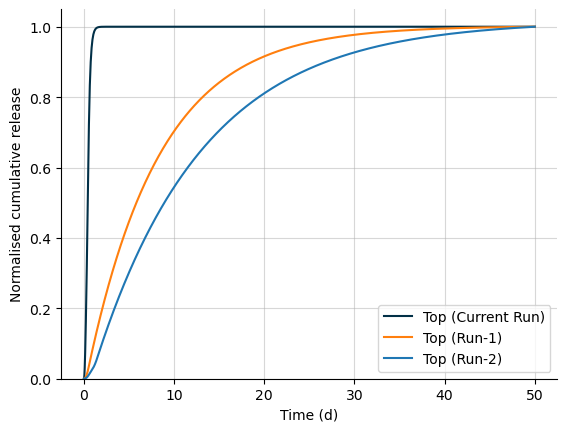

In [14]:
from libra_toolbox.tritium.plotting import COLLECTION_VOLUME, LSC_SAMPLE_VOLUME


def plot_normalised_integrated_top(model, **kwargs):
    integrated_top = quantity_to_activity(model.integrated_release_top()).to(ureg.Bq)
    sample_activity_top = integrated_top / COLLECTION_VOLUME * LSC_SAMPLE_VOLUME

    normalised_top = sample_activity_top / sample_activity_top[-1]

    l = plt.plot(model.times.to(ureg.day), normalised_top, **kwargs)
    return l


plt.figure()

# current run
l = plot_normalised_integrated_top(
    baby_model, color="#023047", label="Top (Current Run)"
)

# run 1
model_run_1 = model_from_json(data_run_1)
model_run_1.run(50 * ureg.day)

l = plot_normalised_integrated_top(model_run_1, color="tab:orange", label="Top (Run-1)")

# run 2
model_run_2 = model_from_json(data_run_2)
model_run_2.run(50 * ureg.day)

l = plot_normalised_integrated_top(model_run_2, color="tab:blue", label="Top (Run-2)")

plt.ylim(bottom=0)
plt.grid(alpha=0.5)
plt.legend()

plt.ylabel("Normalised cumulative release")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")

plt.show()